Objective of this notebook:
1. Learn how to use StratifiedKfold - check 09/11/2017
2. Practice the use of sns heatmap - check 09/11/2017
3. Process the data to apply machine learning algorithm - check 09/11/2017
4. Compare different ML algorithm - check 09/11/2017
5. Output best result and submit to Kaggle - check 09/11/2017

Next objectives:
1. Improve data wrangling, in order to use features 'Name' and 'Age'
2. Try to use 

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [49]:
train = pd.read_csv('C:/Users/Mako/Documents/Python Scripts/Kaggle/Titanic/train.csv')
test = pd.read_csv('C:/Users/Mako/Documents/Python Scripts/Kaggle/Titanic/test.csv')

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
train_sex =pd.get_dummies(train['Sex'])
test_sex =pd.get_dummies(test['Sex'])
train_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


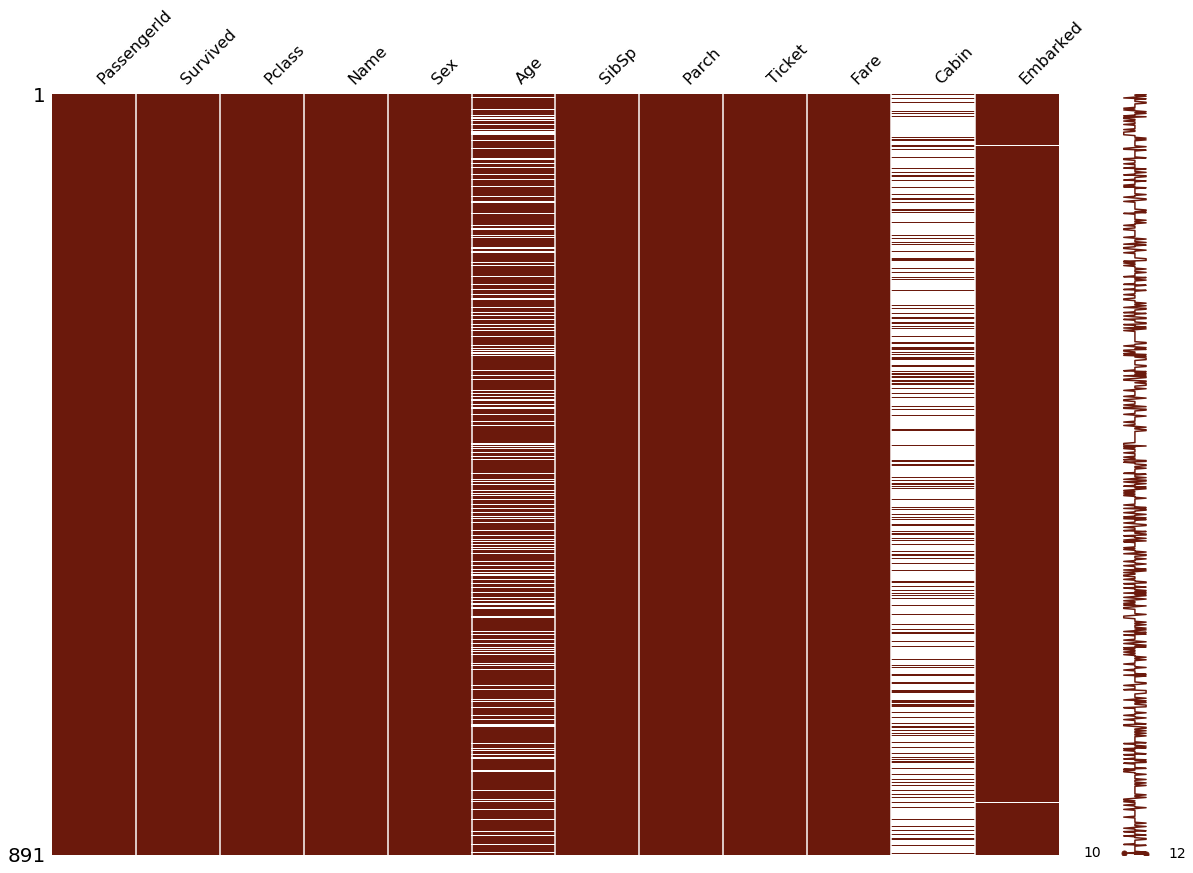

In [13]:
msno.matrix(df=train, figsize=(20, 14), color=(0.42, 0.1, 0.05))

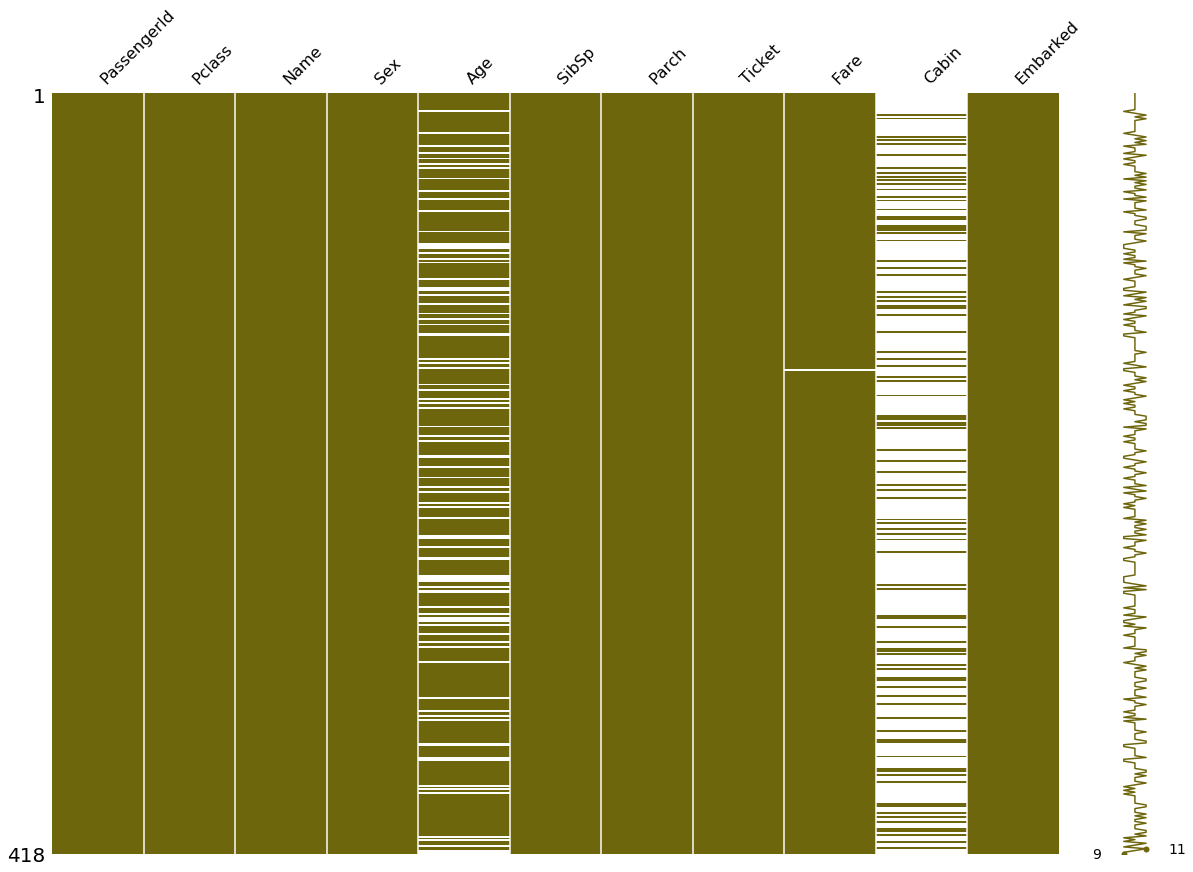

In [19]:
msno.matrix(df=test, figsize=(20, 14), color=(0.43, 0.4, 0.05))

In [20]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
surv = train['Survived']


In [27]:
train = train.drop('Survived',axis=1)

In [28]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [52]:
passid = train['PassengerId']

In [53]:
train = train.drop('PassengerId',axis =1)

In [54]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [55]:
tpassid = test['PassengerId']
test = test.drop('PassengerId',axis = 1)

In [65]:
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})
train_emb = pd.get_dummies(train['Embarked'])
test_emb = pd.get_dummies(test['Embarked'])
train_emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [66]:
train_rdy = train[['Pclass', 'SibSp','Parch','Fare']]
test_rdy = test[['Pclass', 'SibSp','Parch','Fare']]
train_rdy

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500
5,3,0,0,8.4583
6,1,0,0,51.8625
7,3,3,1,21.0750
8,3,0,2,11.1333
9,2,1,0,30.0708


In [68]:
train_rdy = pd.concat([train_rdy,train_emb,train_sex],axis=1)
test_rdy = pd.concat([test_rdy,test_emb,test_sex],axis=1)
train_rdy

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1
5,3,0,0,8.4583,0,1,0,0,1
6,1,0,0,51.8625,0,0,1,0,1
7,3,3,1,21.0750,0,0,1,0,1
8,3,0,2,11.1333,0,0,1,1,0
9,2,1,0,30.0708,1,0,0,1,0


In [69]:
train_rdy.isnull().sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
female    0
male      0
dtype: int64

In [70]:
cor_matrix = train_rdy.corr().round(2)

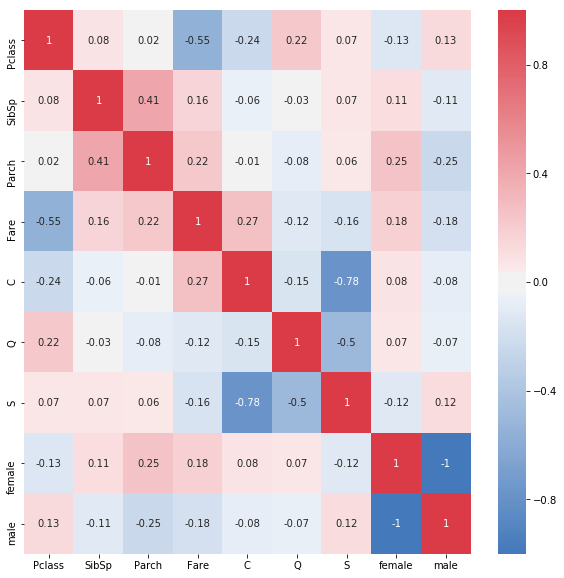

In [86]:
fig = plt.figure(figsize=(10,10));
sns.heatmap(cor_matrix,cmap = sns.diverging_palette(250, 10, as_cmap=True),annot=True);
plt.show()

In [102]:
X = train_rdy.values
y = surv.values
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X,y)
print(skf)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    clf=GradientBoostingClassifier()
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
0.776536312849
0.782122905028
0.865168539326
0.775280898876
0.813559322034


In [104]:
clf=GradientBoostingClassifier()
clf.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [113]:
test_rdy.groupby(['Pclass'])['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [120]:
test_rdy[test_rdy.Fare.isnull()]

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
152,3,0,0,NaN,0,0,1,0,1


In [121]:
test_rdy= test_rdy.fillna(12.45)

In [122]:
test_rdy.isnull().sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
female    0
male      0
dtype: int64

In [124]:
len(clf.predict(test_rdy))

418

In [126]:
tpassid

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [130]:
x = clf.predict(test_rdy)
sub = pd.DataFrame()
sub['PassengerId'] = tpassid
sub['Survived'] = x
sub.to_csv('gbk.titanic.csv', index=False)